# Prologue: Statistical Metrics and Evaluation

To utilize the content of this page optimally, I recommend consulting the relevant topic to gain a deeper understanding of specific subjects.

## Training, Validation, and Test sets

The process of partitioning a dataset into training, validation, and test sets is of paramount importance when it comes to evaluating predictive models effectively. This practice is elucidated and supported by the following explanations {cite:p}`priddy2005artificial,dangeti2017statistics`:

1. **Training Set**: The training set, constituting the largest portion of the dataset, serves as the bedrock for model development. Within this segment, machine learning algorithms glean insights from the data's patterns. It is during this phase that the model is meticulously trained to recognize intricate relationships and make accurate predictions.

2. **Validation Set**: Following the training phase, the model's performance is rigorously assessed using the validation set. This evaluation process is instrumental in fine-tuning the model's hyperparameters and gauging its ability to generalize to new data. The validation set holds a critical role in preventing the model from overfitting or underfitting the training data.

3. **Test Set**: Different from the training set, the test set serves as an unbiased measure for evaluating the model’s performance on completely new and unseen data. Its primary function is to provide an estimate of how well the model is likely to perform when deployed in a real-world context.

```{figure} Data_Distribution.jpg
---
width: 500px
align: center
---
The dataset is divided into three subsets: training, validation, and test, with an 80% allocation for training data, and 10% each for validation and testing.
```


The partitioning of a dataset into these three subsets represents a fundamental and established practice in the development of robust machine learning models. This approach is widely embraced both within the academic sphere and the broader field of data analysis.

There are scenarios where only the training and test sets are used, and the validation set is omitted. The decision to exclude the validation set can be based on the specifics of the problem and the available data. Here are a few situations where using only the training and test sets might be appropriate:

1. **Large Datasets**: When you have a substantial amount of data, the training set can be sizeable enough to adequately train the model while still leaving a substantial portion for testing. In such cases, the need for a separate validation set is reduced.

2. **K-Fold Cross-Validation**: Instead of a fixed validation set, you can perform K-fold cross-validation using the training data. This involves splitting the training data into K subsets (folds) and iteratively using each fold as a validation set while training on the remaining data. This can provide a more robust assessment of model performance without the need for a dedicated validation set.

3. **Limited Data Availability**: In situations where data is scarce, allocating a portion to a validation set may significantly reduce the training data's size, impacting the model's ability to learn. In such cases, some practitioners choose to rely on the test set to evaluate the model's performance.

4. **Time Series Data**: When dealing with time series data, it's common to use only a training set and a test set. This is because the order of data points is critical, and random shuffling, as typically done with validation sets, can lead to data leakage. In time series analysis, the test set often represents future data points.

However, it's essential to be cautious when omitting a validation set. The validation set is crucial for hyperparameter tuning and ensuring that the model generalizes well. If you choose to exclude it, you should be aware of the potential risks, such as overfitting or suboptimal model performance due to poor hyperparameter choices. The decision should be made based on a careful consideration of the specific problem, dataset size, and available resources.

## Standard Error

In statistics, the **standard error (SE)** is a way to measure how accurate an estimated value is, like the coefficients in a linear regression. It shows the average amount by which estimates can vary when we take multiple samples from the same group {cite:p}`Scott2010,breiman2017classification`.

The standard error (SE) is typically calculated using this formula:

\begin{equation} \text{SE} = \frac{s}{\sqrt{n}} \end{equation}

Where:
- $ s $ represents the sample standard deviation, which measures the variability of data points within the sample.
- $ n $ is the number of data points (sample size).

This formula provides a straightforward way to compute the standard error, which quantifies the precision of an estimated value based on a given sample.

,Year,Month,Mean Temp (°C)
Date/Time,,,
2000-06-01,2000,6,13.0
2000-07-01,2000,7,17.2
2000-08-01,2000,8,16.0
2000-09-01,2000,9,11.1
2000-10-01,2000,10,5.6
...,...,...,...
2007-07-01,2007,7,19.9
2007-08-01,2007,8,14.6
2007-09-01,2007,9,10.6


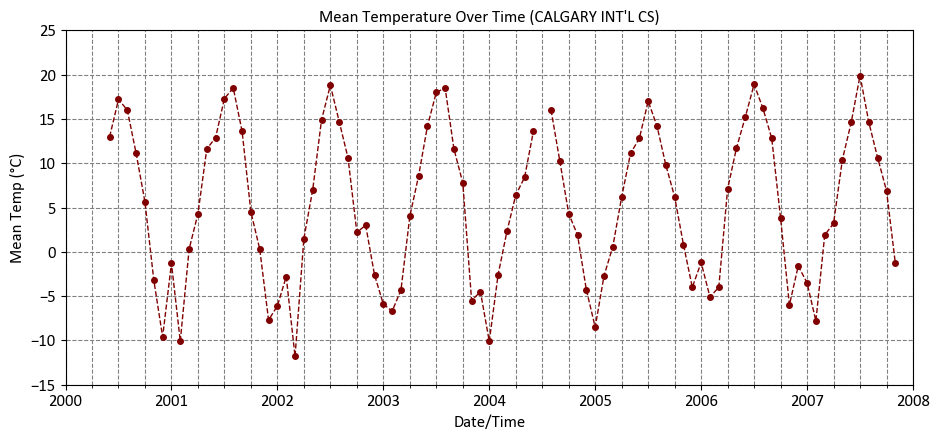

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the matplotlib style using a custom style file
plt.style.use('../mystyle.mplstyle')

# Define the URL for the data
Link = 'https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID=27211&Year=2007&Month=1&Day=1&time=&timeframe=3&submit=Download+Data'

# Read the CSV data and select specific columns
df = pd.read_csv(Link, usecols=['Date/Time', 'Year', 'Month', 'Mean Temp (°C)'])

# Convert the 'Date/Time' column to datetime format and set it as the index
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df = df.set_index('Date/Time')

# Display the DataFrame
display(df)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(9.5, 4.5))

# Create a line plot for 'Mean Temp (°C)'
df['Mean Temp (°C)'].plot(ax=ax, kind='line', color='Maroon', marker='.',
                          linestyle='--', linewidth=1,
                          title="""Mean Temperature Over Time (CALGARY INT'L CS)""",
                          xlabel='Date/Time', ylabel='Mean Temp (°C)',
                          xlim=['2000-01-01', '2008-01-01'], ylim=[-15, 25])

# Ensure the plot layout is tight
plt.tight_layout()

In [2]:
import numpy as np

df['Month Name'] = df.index.month_name()
Standard_Error = df.groupby(['Month', 'Month Name'])['Mean Temp (°C)'].std(ddof=1)\
                /np.sqrt(df.groupby(['Month'])['Mean Temp (°C)'].size())
Standard_Error = Standard_Error.to_frame('Standard Error')
display(Standard_Error)

,,Standard Error
Month,Month Name,
1,January,1.293705
2,February,1.107550
3,March,1.895717
4,April,0.756469
5,May,0.692378
6,June,0.337533
7,July,0.382349
8,August,0.588108
9,September,0.465003


We also have the option to compute this using the `scipy` package:

In [3]:
from scipy import stats
Standard_Error = df.dropna().groupby(['Month', 'Month Name'])['Mean Temp (°C)']\
                            .agg(Mean_Temperature_C = 'mean',
                                 SE = lambda x: stats.sem(x)).reset_index(drop = False)
display(Standard_Error)

,Month,Month Name,Mean_Temperature_C,SE
0,1,January,-5.228571,1.293705
1,2,February,-5.400000,1.107550
2,3,March,-2.142857,1.895717
3,4,April,4.671429,0.756469
4,5,May,9.828571,0.692378
5,6,June,13.900000,0.337533
6,7,July,18.157143,0.408748
7,8,August,16.087500,0.588108
8,9,September,11.287500,0.465003
9,10,October,5.162500,0.641688


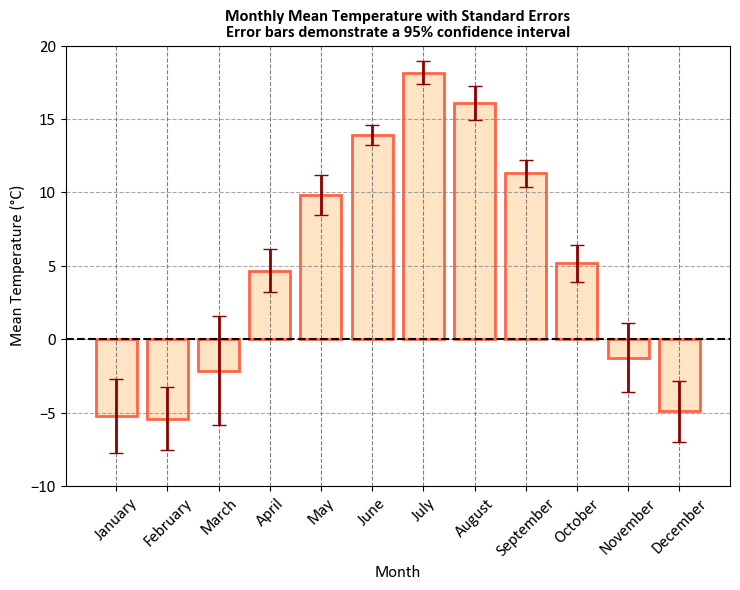

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7.5, 6))

# Create the bar plot with error bars
ax.bar(x=Standard_Error['Month Name'],
       height=Standard_Error.Mean_Temperature_C,
       yerr= 1.96 * Standard_Error.SE,
       capsize=5,
       color='Bisque',
       edgecolor='Tomato',
       linewidth=2,
       error_kw=dict(linewidth=2, ecolor='DarkRed'))

# Set labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Mean Temperature (°C)')
ax.set_title('Monthly Mean Temperature with Standard Errors\nError bars demonstrate a 95% confidence interval', weight='bold')

# Set the Y-axis limits for better visualization
ax.set(ylim=[-10, 20])

# Rotate x-axis labels for better readability
ax.tick_params(axis='x', rotation=45)

# Add a grid for clarity
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for reference
ax.axhline(0, color='k', linewidth=1.5, linestyle='--')

# Customize the appearance
plt.tight_layout()

Let's break down what it represents:

1. **X-Axis (Month Name)**: The X-axis of the plot represents the months of the year, from January to December. Each month is labeled with its name.

2. **Y-Axis (Mean Temperature in °C)**: The Y-axis represents the average (mean) temperature in degrees Celsius for each respective month. It shows the typical or average temperature for that month.

3. **Bars**: The blue bars on the plot represent the mean temperature for each month. The height of each bar indicates the average temperature for that specific month. For example, you can visually compare which months have higher or lower average temperatures.

4. **Error Bars**: The black vertical lines with caps extending from the top of the bars are error bars. These error bars represent the standard error associated with the mean temperature for each month. They show the level of uncertainty in the mean temperature estimate. Larger error bars indicate higher variability, meaning that the temperature data for that month varies more widely.

`````{admonition} Note
:class: warning

If the error bar for a particular data point, such as March in your case, is longer than the actual bar, it typically means that the variability or uncertainty in that data point is relatively high compared to the actual value. This can happen for various reasons, such as:

1. **Small Sample Size:** If you have a small sample size for the data point (March in this case), the estimate of the mean (the actual bar) might have higher uncertainty, leading to a longer error bar.

2. **Outliers:** Outliers in the data can significantly affect the standard error and, consequently, the length of the error bars.

3. **Heteroscedasticity:** If the variability of data is not consistent across all data points, it can result in longer error bars for data points with higher variability.

4. **Skewed Data:** Data distributions that are not symmetric can lead to differences in the standard error and actual values, affecting the error bar length.

`````

<font color='Blue'><b>Example:</b></font> In this example, we have two key variables, $y$ and 'y-hat,' utilized to simulate and explain statistical metrics such as R-squared ($R^2$), Mean Squared Error (MSE), Mean Absolute Error (MAE), and more. $y$ represents the observed data, which we aim to approximate, while $\hat{y}$ is a constructed set of values used for this simulation. $y$ serves as a representation of actual or observed data, although it's important to note that in this case, we do not have a specific model generating $y$ from 'X' or any real-world data. Instead, $y$ is introduced as a reference point against which we can measure the performance of various statistical metrics. $\hat{y}$ is a synthetic or hypothetical dataset, created for the purpose of this simulation. It is designed to emulate the values that a model might predict for $y$ in a real-world scenario. The comparison between $y$ and $\hat{y}$ in this context provides a basis for understanding and evaluating statistical measures, shedding light on how well these metrics assess the relationship between observed and predicted data.

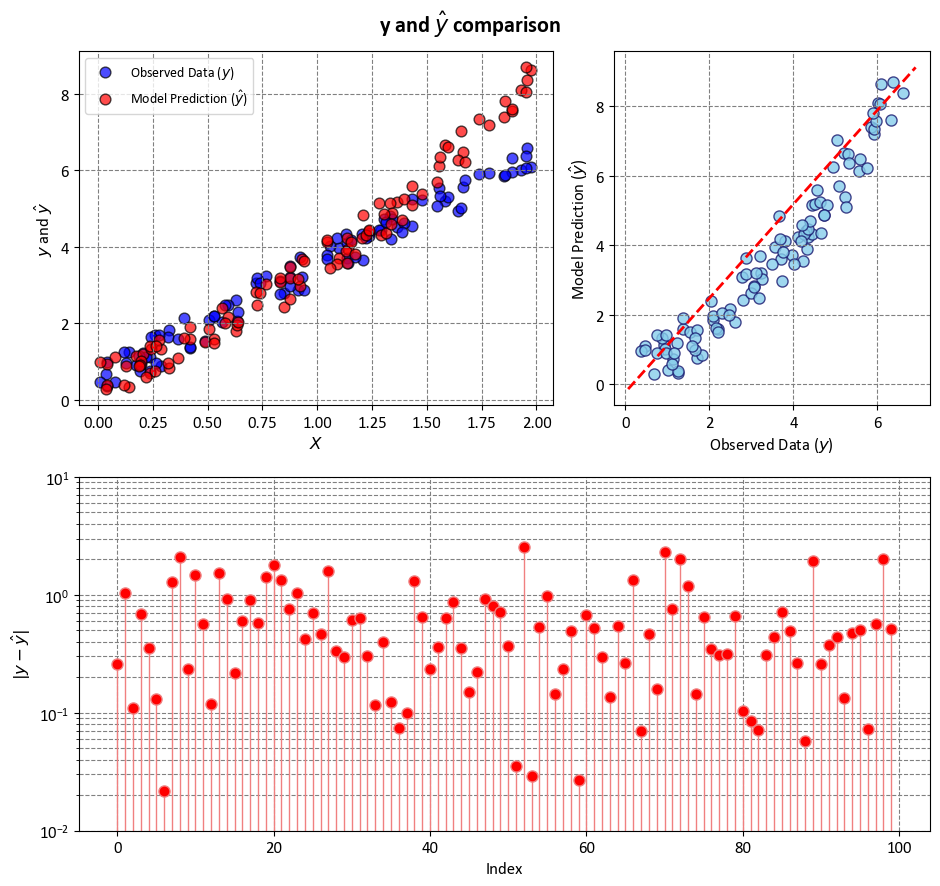

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Create a model or use any other method to make predictions
# In this example, we use a simple quadratic model for demonstration
y_hat = 1 * X**2 + 2 * X + np.random.rand(100, 1)

# =============================================================================
# Figure
# =============================================================================
fig, ax = plt.subplots(2, 2, figsize=(9.5, 9), gridspec_kw={'width_ratios': [.6, .4]})
ax = ax.ravel()

# Plot the data points and model predictions with enhanced styling
ax[0].scatter(X, y, c='blue', edgecolor='k', s=60,
              alpha=0.7, label=r'Observed Data ($y$)')
ax[0].scatter(X, y_hat, c='red', edgecolor='k', s=60,
              alpha=0.7, label=r'Model Prediction ($\hat{y}$)')
ax[0].set(xlabel=r'$X$', ylabel=r'$y$ and $\hat{y}$')
ax[0].legend(loc='upper left')

_ = ax[1].scatter(y, y_hat, facecolors='SkyBlue', edgecolors='MidnightBlue', alpha=0.8)
_ = ax[1].plot([ax[1].get_xlim()[0], ax[1].get_xlim()[1]],
               [ax[1].get_ylim()[0], ax[1].get_ylim()[1]], '--r', linewidth=2)
_ = ax[1].set(xlabel=r'Observed Data ($y$)',
              ylabel=r'Model Prediction ($\hat{y}$)')

gs = ax[2].get_gridspec()
for i in range(2, 4):
    ax[i].remove()
ax3 = fig.add_subplot(gs[1, :])
markerline, _, _ = ax3.stem(np.arange(y.shape[0]), abs(y - y_hat),
                            linefmt='LightCoral', markerfmt='o')
_ = markerline.set_markerfacecolor('red')
_ = ax3.set(aspect='auto', xlabel='Index',
            ylabel=r'$|y - \hat{y}|$',
            yscale='log',
            ylim=[1e-2, 1e1])

_ = fig.suptitle(r'y and $\hat{y}$ comparison', weight='bold', fontsize=16)

plt.tight_layout()

## R-squared Statistic

The R-squared statistic, symbolized as $R^2$, is a valuable metric used in linear regression analysis to gauge the proportion of the total variability observed in the dependent variable ($Y$) that can be explained by the independent variable(s) ($X$) included in the model. It takes values within the range of 0 to 1, where a value of 1 indicates that the model perfectly accounts for the variability in the dependent variable, while a value of 0 suggests that the model fails to explain any of the observed variability {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

The formula for calculating $R^2$ is expressed as:

\begin{align}
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{align}

Here are the components in the formula:
- $n$ represents the number of data points in the dataset.
- $y_i$ signifies the actual value of the dependent variable for the $i$-th data point.
- $\hat{y}_i$ corresponds to the predicted value of the dependent variable for the $i$-th data point based on the regression model.
- $\bar{y}$ denotes the mean value of the dependent variable.

$R^2$ is an essential tool in assessing the goodness of fit of a linear regression model. It quantifies how well the model's predictions align with the actual data. A high $R^2$ value implies that a substantial proportion of the variability in the dependent variable is captured by the model, indicating a better fit. Conversely, a low $R^2$ suggests that the model is not effectively explaining the variability in the dependent variable, and improvements may be necessary.

$R^2$ has important uses, but it's essential to complement its interpretation with other evaluation techniques, especially when working with complex models or in the presence of multicollinearity or heteroscedasticity. Combining $R^2$ with domain knowledge and diagnostic tests ensures a comprehensive understanding of the model's performance.

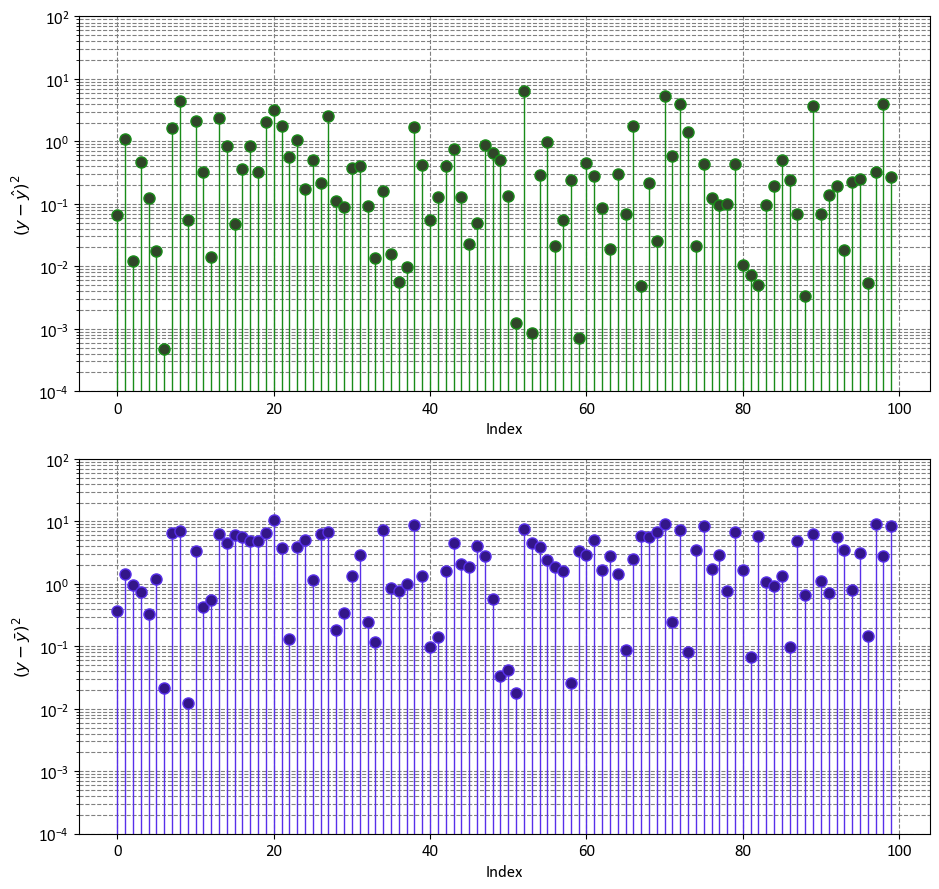

In [6]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(9.5, 9))
ax = ax.ravel()
y_bar = np.mean(y)
markerline, _, _ = ax[0].stem(np.arange(y.shape[0]), (y - y_hat)**2,
                            linefmt='#198c19', markerfmt='o')
_ = markerline.set_markerfacecolor('#304529')
_ = ax[0].set(aspect='auto', xlabel='Index',
            ylabel=r'$(y - \hat{y})^2$',
            yscale='log',
            ylim=[1e-4, 1e2])

markerline, _, _ = ax[1].stem(np.arange(y.shape[0]), (y - y_bar)**2,
                            linefmt='#5830ea', markerfmt='o')
_ = markerline.set_markerfacecolor('#331689')
_ = ax[1].set(aspect='auto', xlabel='Index',
            ylabel=r'$(y - \bar{y})^2$',
            yscale='log',
            ylim=[1e-4, 1e2])

plt.tight_layout()

In [7]:
import numpy as np

def r2_score(y, y_hat):
    # the mean of y
    y_bar = np.mean(y)
    # Sum of Squares Error
    SSE = np.sum((y - y_hat)**2)
    # Total Sum of Squares
    SST = np.sum((y - y_bar)**2)
    return 1 - (SSE / SST)

# Calculate R-squared
r_squared = r2_score(y, y_hat)
print(f'R-squared = {r_squared:.4f}')

R-squared = 0.7726


Using sklearn's built-in `r2_score`:

In [8]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, y_hat)
print(f'R-squared = {r_squared:.4f}')

R-squared = 0.7726


## Mean Squared Error (MSE)

The Mean Squared Error (MSE) is a fundamental metric used to quantify the goodness of fit of a regression model by measuring the average squared difference between the predicted values and the actual values of the dependent variable. It provides a measure of how well the model's predictions align with the observed data {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

Mathematically, the MSE is calculated using the following formula:

\begin{equation}
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Here are the components in the formula:
- $ n $ represents the number of data points in the dataset.
- $ y_i $ signifies the actual value of the dependent variable for the $ i $-th data point.
- $ \hat{y}_i $ corresponds to the predicted value of the dependent variable for the $ i $-th data point based on the regression model.

Interpreting the MSE:
- The MSE measures the average squared difference between the predicted and actual values.
- A lower MSE indicates that the model's predictions are closer to the actual values, implying a better fit.
- A higher MSE suggests that the model's predictions deviate more from the actual values, indicating a poorer fit.

MSE is commonly used as a loss function to assess the performance of regression models during training. It plays a crucial role in model selection and comparison, helping to identify the model that provides the best balance between predictive accuracy and generalization.

It's important to note that while MSE is a valuable metric for evaluating model performance, it should be interpreted in conjunction with other metrics and diagnostic tools to ensure a comprehensive understanding of the model's strengths and limitations.

<font color='Blue'><b>Example:</b></font> Considering the data from the previous instance, we have

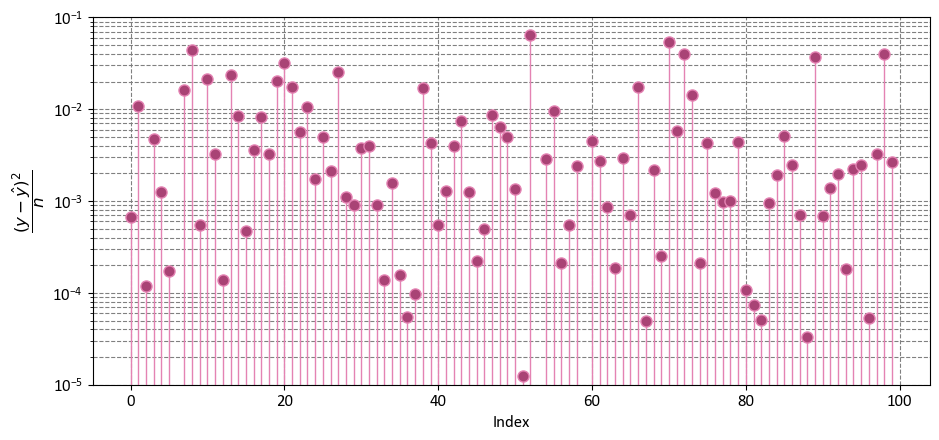

In [9]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(9.5, 4.5))
y_bar = np.mean(y)
markerline, _, _ = ax.stem(np.arange(y.shape[0]), ((y - y_hat)**2)/len(y),
                            linefmt='#e483b3', markerfmt='o')
_ = markerline.set_markerfacecolor('#a94375')
_ = ax.set(aspect='auto', xlabel='Index',
            ylabel=r'$\dfrac{(y - \hat{y})^2}{n}$',
            yscale='log',
            ylim=[1e-5, 1e-1])

plt.tight_layout()

In [10]:
import numpy as np

def MSE_score(y, y_hat):
    # Sum of Squares Error
    SSE = np.sum((y - y_hat)**2)
    return SSE/len(y)

# Calculate the Mean Squared Error to assess the goodness of fit
mse = MSE_score(y, y_hat)
print(f'R-squared = {mse:.4f}')

R-squared = 0.6836


Using sklearn's built-in `mean_squared_error`:

In [11]:
from sklearn.metrics import mean_squared_error
# Calculate the Mean Squared Error to assess the goodness of fit
mse = mean_squared_error(y, y_hat)
print(f'R-squared = {mse:.4f}')

R-squared = 0.6836


## Mean Absolute Error (MAE)

The Mean Absolute Error (MAE) is a fundamental metric used in regression analysis to assess the accuracy of a predictive model by measuring the average absolute differences between the predicted values and the actual values of the dependent variable. It provides insight into how closely the model's predictions align with the observed data {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

Mathematically, the MAE is calculated as follows:

\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

Here are the components in the formula:
- $ n $ represents the number of data points in the dataset.
- $ y_i $ denotes the actual value of the dependent variable for the $ i $-th data point.
- $ \hat{y}_i $ represents the predicted value of the dependent variable for the $ i $-th data point based on the regression model.

Interpreting the MAE:
- The MAE measures the average absolute difference between the predicted and actual values.
- A lower MAE indicates that the model's predictions are closer to the actual values, suggesting a better fit.
- A higher MAE implies that the model's predictions have larger absolute differences from the actual values, indicating a poorer fit.

MAE is often used in combination with other metrics to evaluate the performance of regression models, especially when dealing with outliers or when you want to penalize large prediction errors linearly. It provides valuable insights into the model's predictive accuracy and is a useful tool for model selection and comparison.


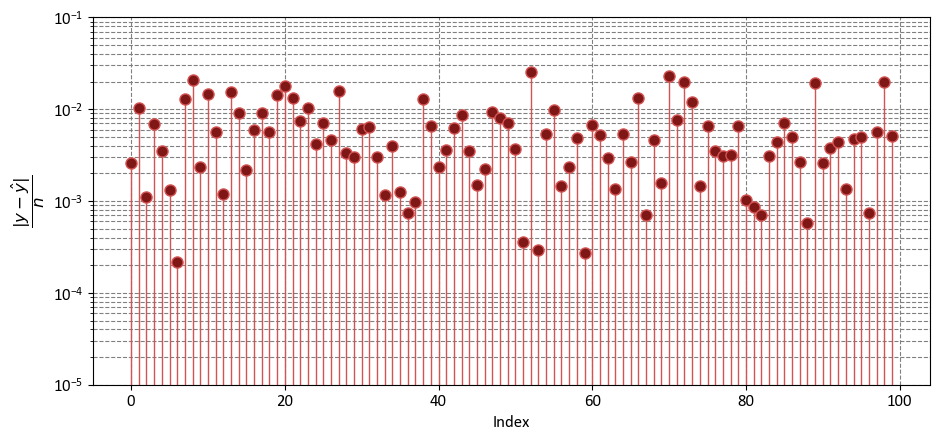

In [12]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(9.5, 4.5))
y_bar = np.mean(y)
markerline, _, _ = ax.stem(np.arange(y.shape[0]), (abs(y - y_hat)/len(y)),
                            linefmt='#d45353', markerfmt='o')
_ = markerline.set_markerfacecolor('#7f1717')
_ = ax.set(aspect='auto', xlabel='Index',
            ylabel=r'$\dfrac{|y - \hat{y}|}{n}$',
            yscale='log',
            ylim=[1e-5, 1e-1])

plt.tight_layout()

In [13]:
import numpy as np

def MAE_score(y, y_hat):
    # Sum of Squares Error
    SSE = np.sum(abs(y - y_hat))
    return SSE/len(y)

# Calculate the Mean Absolute Error to assess the goodness of fit
mae = MAE_score(y, y_hat)
print(f'R-squared = {mae:.4f}')

R-squared = 0.6119


Using sklearn's built-in `mean_absolute_error`:

In [14]:
from sklearn.metrics import mean_absolute_error
# Calculate the Mean Absolute Error to assess the goodness of fit
mae = mean_absolute_error(y, y_hat)
print(f'R-squared = {mae:.4f}')

R-squared = 0.6119


## Correlation Matrix

The correlation matrix is a square matrix that displays the correlations between different variables (parameters) in a given dataset. Each element in the matrix represents the correlation coefficient between two variables. The correlation coefficient measures the strength and direction of the linear relationship between two variables. It ranges from -1 to +1, with -1 indicating a perfect negative linear relationship, +1 indicating a perfect positive linear relationship, and 0 indicating no linear relationship {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

The correlation coefficient between two variables $X$ and $Y$ can be calculated using the formula:

\begin{align}
\text{Cor}(X, Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}}
\end{align}

where:
- $n$ is the number of data points in the dataset.
- $x_i$ and $y_i$ are the values of the $X$ and $Y$ variables, respectively, for the $i$th data point.
- $\bar{x}$ and $\bar{y}$ are the mean values of $X$ and $Y$ variables, respectively.

The correlation matrix provides a convenient way to visualize the relationships between multiple variables in a dataset. It helps identify patterns of association and potential multicollinearity (high correlation between predictor variables) in regression models. A positive correlation coefficient indicates that the variables tend to increase or decrease together, while a negative correlation coefficient indicates an inverse relationship. A correlation coefficient close to 0 suggests little or no linear relationship between the variables.

<font color='Blue'><b>Example - Iris Flower Pair Plot:</b></font>

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


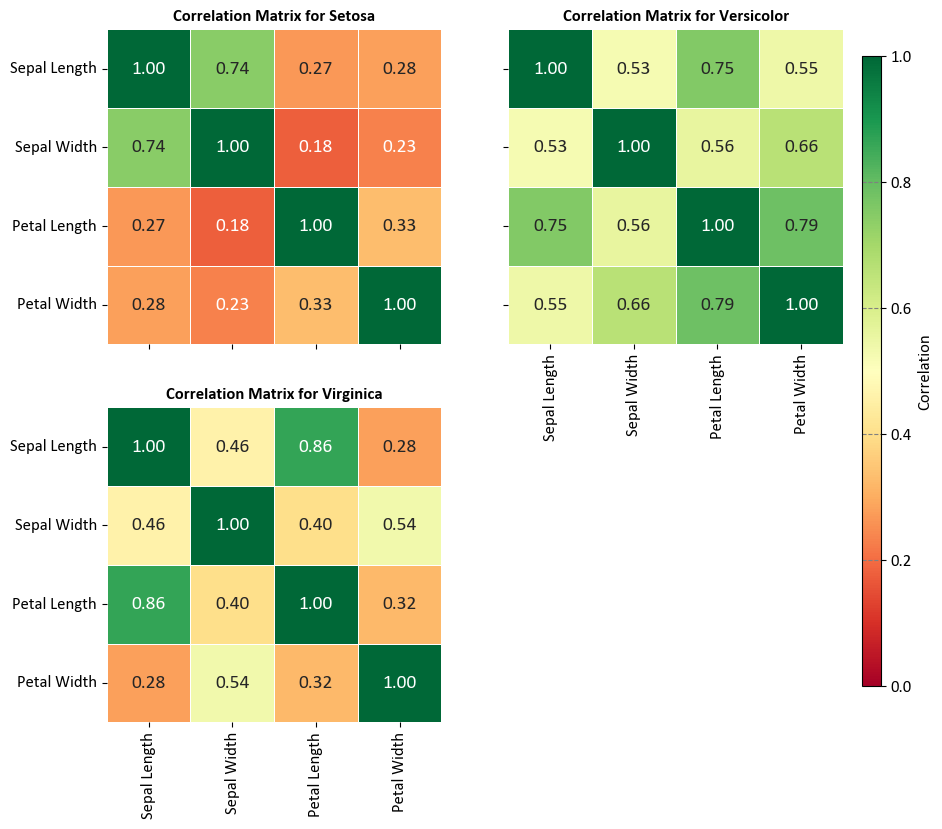

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset and format column titles and species names
iris = sns.load_dataset('iris')
iris.columns = [x.replace('_', ' ').title() for x in iris.columns]
iris.Species = iris.Species.map(lambda x: x.title())

# Display the formatted dataset
display(iris)

# Create a 2x2 grid of subplots with shared axes
fig, axes = plt.subplots(2, 2, figsize=(9.5, 9), sharex=False, sharey=True)
axes = axes.ravel()
# Remove the last subplot
fig.delaxes(axes[-1])

# List of species (Using only the first three species)
species_list = iris['Species'].unique()[:3]

# Calculate and display the correlation matrices for each species
for i, (species, ax) in enumerate(zip(species_list, axes)):
    # Extract data for the current species
    subset = iris[iris['Species'] == species]
    
    # Calculate the correlation matrix for the subset
    correlation_matrix = subset.drop(columns=['Species']).corr()
        
    # Create a heatmap for the correlation matrix on the respective subplot
    sns.heatmap(correlation_matrix, ax=ax,
                annot=True, fmt='.2f',
                cmap='RdYlGn', linewidths=0.5, cbar=False,
                vmin=0, vmax=1,
                annot_kws={"fontsize": 14})
    
    # Set title for the subplot with proper formatting
    ax.set_title(f'Correlation Matrix for {species}', weight='bold')
    
    # Disable grid lines
    ax.grid(False)

plt.setp(axes[0].get_xticklabels(), visible=False)
# Add a single color bar outside the subplots
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Define the position and size of the color bar
sm = plt.cm.ScalarMappable(cmap='RdYlGn')
sm.set_array([])
cbar = plt.colorbar(sm, ax=axes, cax=cax)
cbar.set_label('Correlation', rotation=90)

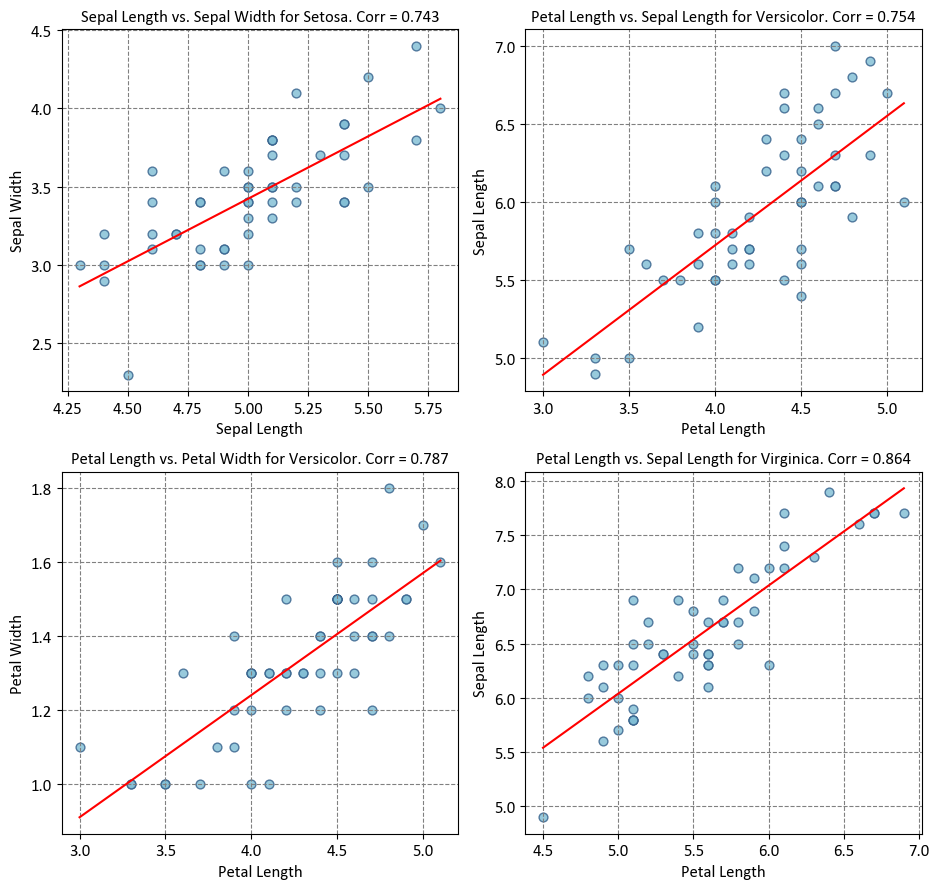

In [16]:
# Import necessary libraries
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots with shared axes
fig, axes = plt.subplots(2, 2, figsize=(9.5, 9))
ax = axes.ravel()

# Define species and corresponding variable pairs
species = ['Setosa', 'Versicolor', 'Versicolor', 'Virginica']
variables = [('Sepal Length', 'Sepal Width'), ('Petal Length', 'Sepal Length'),
             ('Petal Length', 'Petal Width'), ('Petal Length', 'Sepal Length')]

# Loop through species and variables
for i, spec in enumerate(species):
    # Select subset of data for the current species
    subset = iris[iris['Species'] == spec]
    x_var, y_var = variables[i]
    
    # Create a regression plot for the selected variables
    sns.regplot(x=subset[x_var], y=subset[y_var], ci=None,
                scatter_kws={'s': 40, 'fc' : '#7fbdd4', 'ec': '#335f8a'},
                line_kws={'color': 'red'}, ax=ax[i])
    
    # Calculate and display the Pearson correlation coefficient
    corr = stats.pearsonr(subset[x_var], subset[y_var]).statistic
    ax[i].set_title(f'{x_var} vs. {y_var} for {spec}. Corr = {corr:.3f}')

# Adjust subplot layout for better presentation
plt.tight_layout()

The relationship between the heatmap of linear correlation and the plot above lies in their shared objective of visualizing statistical relationships within a dataset. The plot presented here demonstrates scatterplots with regression lines, showcasing how two variables interact within different species of iris flowers. In contrast, a heatmap of linear correlation provides a comprehensive overview of the entire dataset, displaying the correlation coefficients between all pairs of variables in a matrix format. While the plot focuses on specific pairwise relationships within distinct species, the heatmap offers a broader perspective by highlighting the strength and direction of correlations across the entire dataset. Both visualization techniques are valuable tools in exploratory data analysis, with the scatterplot plot offering insights into individual relationships, and the heatmap providing a global view of correlation patterns within the data.

## Confusion Matrix

The confusion matrix is a fundamental tool used to evaluate the performance of classification algorithms by comparing their predictions against actual outcomes. It's especially important for understanding the types of errors a model makes. To explain the math behind the confusion matrix, let's consider a binary classification scenario, where there are two classes: "Positive" (P) and "Negative" (N). In this context, the confusion matrix is a 2x2 matrix with four entries {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`:

```{figure} CM.png
---
width: 420px
align: center
---
Visual representation of a Confusion Matrix.
```

Here's how each of these terms is defined:

- **True Positives (TP)**: The number of instances that are actually positive (P) and are correctly predicted as positive by the classification algorithm.

- **False Positives (FP)**: The number of instances that are actually negative (N) but are incorrectly predicted as positive (P) by the algorithm.

- **True Negatives (TN)**: The number of instances that are actually negative (N) and are correctly predicted as negative by the algorithm.

- **False Negatives (FN)**: The number of instances that are actually positive (P) but are incorrectly predicted as negative (N) by the algorithm.

These elements provide valuable information about the performance of a classification model. They can be used to calculate various metrics like accuracy, precision, recall (sensitivity), specificity, and F1-score, which provide deeper insights into the model's effectiveness in different aspects.

Keep in mind that the terms TP, FP, TN, and FN can have different interpretations depending on the context of the problem. For instance, in medical diagnostics, a false negative (FN) might mean failing to identify a disease in a patient, which could have significant consequences. Understanding the confusion matrix helps in understanding the strengths and weaknesses of a classification model in real-world applications.

<font color='Blue'><b>Confusion Matrix Example in Environmental Classification: Water Pollution Detection (Fictional):</b></font>
Consider the following fictional example of a confusion matrix in the context of environmental classification, specifically applied to the detection of pollution in water samples:

|                              | **Actual Polluted Water** | **Actual Clean Water** |
|:----------------------------:|:-------------------------:|:----------------------:|
| **Predicted Polluted Water** |               85          |            10          |
|   **Predicted Clean Water**  |               15          |           120          |

In this confusion matrix:

- "Clean Water" represents water samples that are truly clean and free from pollution.
- "Polluted Water" represents water samples that are contaminated or polluted.
- "Predicted Clean" represents water samples that a pollution detection system has correctly classified as clean.
- "Predicted Polluted" represents water samples that a pollution detection system has correctly classified as polluted.

Now, let's interpret the numbers:

- There are 120 water samples that are truly clean (Clean Water) and were correctly classified as clean (Predicted Clean).
- There are 15 water samples that are polluted (Polluted Water) but were incorrectly classified as clean (Predicted Clean).
- There are 10 water samples that are truly clean (Clean Water) but were incorrectly classified as polluted (Predicted Polluted).
- There are 85 water samples that are polluted (Polluted Water) and were correctly classified as polluted (Predicted Polluted).

In the context of the provided confusion matrix, which is used to evaluate the performance of a pollution detection system in water samples, we can interpret the terms TP (True Positives), FP (False Positives), TN (True Negatives), and FN (False Negatives) as follows:

1. **True Positives (TP):**
   - TP represents the cases where the pollution detection system correctly predicted that water samples were polluted (Predicted Polluted) and indeed, they were polluted (Actual Polluted Water).
   - In this example, there are 85 instances where the system correctly identified polluted water samples.

2. **False Positives (FP):**
   - FP represents the cases where the pollution detection system incorrectly predicted that water samples were polluted (Predicted Polluted), but in reality, they were clean (Actual Clean Water).
   - There are 10 instances where the system incorrectly classified clean water samples as polluted.

3. **True Negatives (TN):**
   - TN represents the cases where the pollution detection system correctly predicted that water samples were clean (Predicted Clean) and indeed, they were clean (Actual Clean Water).
   - In this example, there are 120 instances where the system correctly identified clean water samples.

4. **False Negatives (FN):**
   - FN represents the cases where the pollution detection system incorrectly predicted that water samples were clean (Predicted Clean), but in reality, they were polluted (Actual Polluted Water).
   - There are 15 instances where the system failed to detect pollution in water samples that were actually polluted.

## Accuracy: Evaluating Correct Classifications

Accuracy is a metric that quantifies the ratio of correctly classified instances to the total predictions made by a model. It's determined using the elements of the confusion matrix {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`:

\begin{equation}
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

While commonly employed, accuracy may lead to misinterpretations, particularly in cases of imbalanced datasets. In such scenarios, where one class dominates, high accuracy can be achieved even when the model struggles to discern the minority class. Therefore, while accuracy provides an overall view of model performance, it's advisable to complement it with additional metrics, especially when dealing with imbalanced data distributions.

<font color='Blue'><b>Example:</b></font>
In the context of the Water Pollution Detection example, accuracy is computed using the following formula:

\begin{equation*}
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation*}

Where:
- TP (True Positives) denotes instances where the pollution detection system correctly predicted "Polluted Water" (85).
- TN (True Negatives) represents instances where the system correctly predicted "Clean Water" (120).
- FP (False Positives) correspond to instances where the system incorrectly predicted "Polluted Water" when it was actually "Clean Water" (10).
- FN (False Negatives) denote instances where the system incorrectly predicted "Clean Water" when it was actually "Polluted Water" (15).

Utilizing these values in the formula, we compute the accuracy as follows:

\begin{equation*}
\text{Accuracy} = \frac{85 + 120}{85 + 120 + 10 + 15} = \frac{205}{230} \approx 0.8913
\end{equation*}

Thus, the accuracy of the pollution detection system in this example is approximately 0.8913 or 89.13%.

## Precision

Precision is a metric that measures the accuracy of positive predictions generated by a model, taking false positives into account. It's derived from the confusion matrix elements {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`:

\begin{equation}
\text{Precision} = \frac{TP}{TP + FP}
\end{equation}

Precision gains significance in situations where the implications of false positives are significant. In scenarios where mistakenly predicting a positive outcome has notable consequences, precision serves as a vital indicator of a model's ability to avoid making erroneous positive predictions.

<font color='Blue'><b>Example:</b></font> In the context of the Water Pollution Detection example,

* **Precision for Polluted Water:**
\begin{equation*} \text{Precision} = \frac{TP}{TP + FP}  = \frac{85}{85 + 10} = \frac{85}{95} \approx 0.8947 \end{equation*}

* **Precision for Clean Water:**
\begin{equation*} \text{Precision} = \frac{TN}{TN + FN} = \frac{120}{120 + 15} = \frac{120}{135} \approx 0.8889 \end{equation*}

## Recall (Sensitivity or True Positive Rate)

Recall, also known as sensitivity or the true positive rate, quantifies a model's capacity to identify all positive instances, even when considering false negatives. This metric is calculated using the confusion matrix elements {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`:

\begin{equation}
\text{Recall} = \frac{TP}{TP + FN}
\end{equation}

Recall holds paramount importance in situations where the avoidance of false negatives is critical. When failing to detect positive cases can have significant repercussions, recall serves as a pivotal indicator of a model's effectiveness in recognizing positive instances, ensuring minimal instances are overlooked.

<font color='Blue'><b>Example:</b></font> In the context of the Water Pollution Detection example,

* **Recall for Polluted Water:**
\begin{equation*} \text{Recall} = \frac{TP}{TP + FN} =  \frac{85}{85 + 15} = \frac{85}{100} = 0.85 \end{equation*}

* **Recall for Clean Water:**
\begin{equation*} \text{Recall} = \frac{TN}{TN + FP} = \frac{120}{120 + 10} = \frac{120}{130} \approx 0.9231 \end{equation*}

## F1-Score

The F1-Score presents a harmonious equilibrium between precision and recall, while accounting for both false positives and false negatives. It's calculated using the confusion matrix elements {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`:

\begin{equation}
\text{F1-Score} = 2 \times  \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}
\end{equation}

When a trade-off situation emerges between precision and recall, the F1-Score serves as a valuable indicator. In scenarios where achieving high precision might lower recall or vice versa, the F1-Score provides comprehensive insight into a model's performance by considering the balance between these two vital aspects of prediction accuracy.

<font color='Blue'><b>Example:</b></font>
In the context of the Water Pollution Detection example,

* **F1 Score for Polluted Water:**
\begin{equation} \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}  = 2 \cdot \frac{0.8947 \cdot 0.85}{0.8947 + 0.85} \approx 0.8711 \end{equation}

* **F1 Score for Clean Water:**
\begin{equation} \text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}  = 2 \cdot \frac{0.8889 \cdot 0.9231}{0.8889 + 0.9231} \approx 0.9056 \end{equation}

## Balanced Accuracy

Balanced Accuracy is a metric that addresses the challenges posed by imbalanced datasets, where one class significantly outweighs the others. It calculates the average accuracy for each class, providing a more reliable measure of overall model performance {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

The Balanced Accuracy is calculated as the average of the true positive rate (Recall) for each class:

\begin{equation}
\text{Balanced Accuracy} = \frac{1}{N} \sum_{i=1}^{N} \frac{TP_i}{TP_i + FN_i}
\end{equation}

Where:
- $N$ is the number of classes.
- $TP_i$ is the true positive count for class $i$.
- $FN_i$ is the false negative count for class $i$.

Balanced Accuracy takes into account the individual class performance, making it particularly useful for evaluating models in scenarios where class distribution is skewed. It offers a fairer assessment of how well a model performs across all classes, providing a more accurate representation of its effectiveness on imbalanced datasets.

In binary classification scenarios, Balanced Accuracy can be defined as the average of two key metrics: sensitivity (the true positive rate) and specificity (the true negative rate). Alternatively, it can be likened to the area under the Receiver Operating Characteristic (ROC) curve when using binary predictions instead of continuous scores. Mathematically, this can be expressed as:

\begin{equation} \text{Balanced Accuracy} = \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right) \end{equation}

This formula captures the balanced evaluation of a binary classification model's ability to correctly identify both positive and negative instances while considering the trade-off between them.

<font color='Blue'><b>Example:</b></font> In the context of the Water Pollution Detection example,
\begin{align*}
\text{Balanced Accuracy} &= \frac{1}{2} \left( \frac{TP}{TP + FN} + \frac{TN}{TN + FP} \right) \\
&= \frac{\text{Recall for Clean Water} + \text{Recall for Polluted Water}}{2} \\
&= \frac{1}{2} \left( \frac{0.9231 + 0.85}{2} \right) \approx 0.8866.
\end{align*}


## Matthews Correlation Coefficient (MCC) 

The Matthews Correlation Coefficient (MCC) is a metric used to assess the quality of binary classification models. It takes into account true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) to provide a balanced evaluation of classification performance, especially when dealing with imbalanced datasets {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

MCC ranges from -1 to +1, where:
- +1 indicates perfect prediction.
- 0 indicates no better than random prediction.
- -1 indicates perfect disagreement between predictions and actual classes.

Mathematically, MCC is calculated as:

\begin{equation}
\text{MCC} = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP)(TP + FN)(TN + FP)(TN + FN)}}
\end{equation}

Here's how the components of the formula contribute:

- $TP \times TN$ term rewards correct positive and negative predictions.
- $FP \times FN$ term penalizes the count of false positive and false negative predictions.
- The denominator normalizes the score, accounting for class distribution.

Key points about MCC:

1. **Balanced Metric**: MCC is suitable for imbalanced datasets because it considers TP, TN, FP, and FN, providing a balanced evaluation.

2. **Symmetry**: MCC is symmetric, meaning that swapping the positive and negative classes doesn't affect the score.

3. **Sensitive to Class Imbalance**: Unlike accuracy, MCC isn't easily misled by imbalanced data.

4. **Usefulness**: MCC helps identify how well the model's predictions align with the actual classes, considering all four possible outcomes of binary classification.

<font color='Blue'><b>Example:</b></font>
We also can calculate the Matthews Correlation Coefficient (MCC) for the Water Pollution Detection example as follows:

In [17]:
import math

def calculate_mcc(tp, tn, fp, fn):
    numerator = (tp * tn) - (fp * fn)
    denominator = math.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc = numerator / denominator if denominator != 0 else 0.0
    
    return mcc

mcc = calculate_mcc(tp=85, tn=120, fp=10, fn=15)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

Matthews Correlation Coefficient (MCC): 0.7783


## Cohen's Kappa
Cohen's Kappa, often referred to simply as Kappa, is a statistic used to measure the level of agreement between two raters or evaluators, especially in situations involving categorical data or classification tasks. It's particularly useful when assessing the reliability or consistency of human judgments or the agreement between human judgments and machine predictions {cite:p}`Scott2010,powers2011evaluation,sklearnUserGuide`.

Kappa takes into account the agreement that could occur by chance and provides a normalized score that indicates the extent to which the observed agreement between raters or evaluators is beyond what could be expected by chance alone.

The formula for Cohen's Kappa is as follows:

\begin{equation}
\text{Kappa} = \frac{P_o - P_e}{1 - P_e}
\end{equation}

Where:
- $ P_o $ is the observed proportion of agreement between the raters or evaluators.
- $ P_e $ is the proportion of agreement expected by chance, calculated as the product of the marginal frequencies of the categories being rated.

Key points about Cohen's Kappa:

1. **Range of Values**: Kappa values range from -1 to +1.
   - $ +1 $: Perfect agreement between raters.
   - $ 0 $: Agreement equivalent to chance.
   - $ -1 $: Complete disagreement between raters.

2. **Adjustment for Chance**: Kappa adjusts for agreement that could occur by random chance.

3. **Interpretation**: The interpretation of Kappa values varies, but typically:
   - $ 0.2 $ or less: Poor agreement.
   - $ 0.21 - 0.40 $: Fair agreement.
   - $ 0.41 - 0.60 $: Moderate agreement.
   - $ 0.61 - 0.80 $: Substantial agreement.
   - $ 0.81 - 1.00 $: Almost perfect agreement.

4. **Considerations**: Cohen's Kappa is sensitive to the distribution of categories and can be affected by the prevalence of a particular category.

Cohen's Kappa is a valuable tool in fields such as inter-rater reliability studies, medical diagnoses, and social sciences, where assessing agreement among raters is crucial. It provides insight into the reliability of judgments beyond raw agreement percentages and helps ensure the consistency and quality of human or machine-based evaluations.

In the context of a binary classification confusion matrix used in machine learning and statistics, Cohen's Kappa formula can be expressed as follows:

\begin{equation}
\kappa = \frac{2 \times (TP \times TN - FN \times FP)}{(TP + FP) \times (FP + TN) + (TP + FN) \times (FN + TN)}
\end{equation}

Where:
- TP represents the true positives.
- FP represents the false positives.
- TN represents the true negatives.
- FN represents the false negatives.

Cohen's Kappa is a metric used to assess the agreement between observed and expected classification results in binary classification scenarios. It quantifies the level of agreement beyond what would be expected by chance. Notably, in this context, Cohen's Kappa is equivalent to the Heidke skill score used in Meteorology. This measure has a historical origin, as it was first introduced by Myrick Haskell Doolittle in 1888.

<font color='Blue'><b>Example:</b></font> In the Water Pollution Detection example, we can calculate Cohen's Kappa as follows:

**Total Number of Samples ($N$):**
\begin{equation}
N = \text{TP} + \text{TN} + \text{FP} + \text{FN} = 85 + 120 + 10 + 15 = 230
\end{equation}

**Observed Agreement ($po$):**
\begin{equation}
po = \frac{\text{TP} + \text{TN}}{N} = \frac{85 + 120}{230} = \frac{205}{230}
\end{equation}

**Probabilities of Random Agreement ($pe_{\text{polluted}}, pe_{\text{clean}}$):**
\begin{equation}
pe_{\text{polluted}} = \frac{(\text{TP} + \text{FP}) \times (\text{TP} + \text{FN})}{N^2} = \frac{(85 + 10) \times (85 + 15)}{230^2}
\end{equation}
\begin{equation}
pe_{\text{clean}} = \frac{(\text{TN} + \text{FP}) \times (\text{TN} + \text{FN})}{N^2} = \frac{(120 + 10) \times (120 + 15)}{230^2}
\end{equation}

**Cohen's Kappa ($\kappa$):**
\begin{equation}
\kappa = \frac{po - (pe_{\text{polluted}} + pe_{\text{clean}})}{1 - (pe_{\text{polluted}} + pe_{\text{clean}})} \approx 0.7776
\end{equation}

In [18]:
def calculate_cohens_kappa(tp, tn, fp, fn):
    # Calculate the total number of samples
    total_samples = tp + tn + fp + fn
    
    # Calculate observed agreement (po)
    po = (tp + tn) / total_samples
    
    # Calculate the probabilities of random agreement for each category
    pe_polluted = ((tp + fp) / total_samples) * ((tp + fn) / total_samples)
    pe_clean = ((tn + fp) / total_samples) * ((tn + fn) / total_samples)
    
    # Calculate Cohen's Kappa
    kappa = (po - (pe_polluted + pe_clean)) / (1 - (pe_polluted + pe_clean))
    
    return kappa

# Define the values (you can replace these with your specific values)
tp = 85
tn = 120
fp = 10
fn = 15

# Calculate Cohen's Kappa using the function
kappa = calculate_cohens_kappa(tp, tn, fp, fn)
print(f"Cohen's Kappa: {kappa:.4f}")

Cohen's Kappa: 0.7776


Calculating Cohen's Kappa for the Water Pollution Detection example using the binary formula:

\begin{align}
\kappa &= \frac{2 \times (TP \times TN - FP \times FN)}{(TP + FP) \times (FP + TN) + (TP + FN) \times (FN + TN)} \\
&= \frac{2 \times (85 \times 120 - 10 \times 15)}{(85 + 10) \times (10 + 120) + (85 + 15) \times (15 + 120)} \\
&= \frac{2 \times (10200 - 150)}{(95) \times (130) + (100) \times (135)} \\
&= \frac{2 \times 10050}{12350 + 13500} \\
&= \frac{20100}{25850} \approx 0.7776
\end{align}

In [19]:
def calculate_cohens_kappa_alt(tp, tn, fp, fn):
    # Calculate Cohen's Kappa using the alternative formula
    kappa = (2 * (tp * tn - fp * fn)) / ((tp + fp) * (fp + tn) + (tp + fn) * (fn + tn))
    return kappa

# Define the values (you can replace these with your specific values)
tp = 85
tn = 120
fp = 10
fn = 15

# Calculate Cohen's Kappa using the alternative formula and the function
kappa = calculate_cohens_kappa_alt(tp, tn, fp, fn)
print(f"Cohen's Kappa: {kappa:.4f}")

Cohen's Kappa: 0.7776


## Scikit-learn's metrics

Scikit-learn's functions, such as `sklearn.metrics.accuracy_score`, `sklearn.metrics.precision_score`, `sklearn.metrics.recall_score`, and `sklearn.metrics.f1_score`, make use of these fundamental metrics for their computations. By interpreting these metrics within the context of the confusion matrix, practitioners can acquire a more profound insight into their model's capabilities and limitations. This enhanced understanding empowers them to make informed decisions throughout the various stages of model development and deployment {cite:p}`pedregosa2011scikit,powers2011evaluation,sklearnUserGuide`.


| Metric                       | Description                                                                                     | Formula or Usage                                                                                                            |
|------------------------------|-------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| `accuracy_score`             | Computes accuracy, the ratio of correctly predicted instances to the total instances.         | `accuracy_score(y_true, y_pred)`                                                                                           |
| `balanced_accuracy_score`    | Calculates accuracy, considering imbalanced classes by averaging accuracy across classes.      | `balanced_accuracy_score(y_true, y_pred)`                                                                                  |
| `precision_score`            | Measures the proportion of true positive predictions among all positive predictions.          | `precision_score(y_true, y_pred)`                                                                                         |
| `recall_score`               | Computes the proportion of true positive predictions among actual positive instances.          | `recall_score(y_true, y_pred)`                                                                                            |
| `f1_score`                   | Balances precision and recall, combining them into a single score.                             | `f1_score(y_true, y_pred)`                                                                                                |
| `specificity_score`          | Measures the proportion of true negative predictions among actual negative instances.          | Calculate sensitivity, then apply `specificity_score = 1 - sensitivity`.                                                  |
| `neg_pred_value`             | Calculates the likelihood of true negative predictions among all predicted negatives.          | `neg_pred_value = TN / (TN + FN)`                                                                                         |
| `false_positive_rate`        | Computes the proportion of false positive predictions among actual negative instances.          | `false_positive_rate = FP / (FP + TN)`                                                                                    |
| `false_negative_rate`        | Measures the rate of false negative predictions among actual positive instances.                | `false_negative_rate = FN / (FN + TP)`                                                                                    |
| `matthews_corrcoef`          | Incorporates true positives, true negatives, false positives, and false negatives into one value. | `matthews_corrcoef(y_true, y_pred)`                                                                                       |
| `cohen_kappa_score`          | Measures agreement between raters or evaluators while considering chance.                        | `cohen_kappa_score(y1, y2)`                                                                                               |
| ...                          | Additional metrics such as AUC-ROC, AUC-PR, log loss, etc.                                       | Various functions available in `sklearn.metrics`                                                                           |


## Additioal Information for `statsmodels.api` (Optional Content)

The terms you've mentioned are statistical measures often included in regression analysis output or summary tables. They provide information about various aspects of the model's goodness of fit, normality of residuals, and potential issues. Let's delve into each of these metrics:

### Standard Error and Coefficient Precision in Statistics

In statistics, the **standard error (SE)** is a way to measure how accurate an estimated value is, like the coefficients in a linear regression. It shows the average amount by which estimates can vary when we take multiple samples from the same group {cite:p}`Scott2010,breiman2017classification`.

For a coefficient estimate $ \beta $ in a linear regression, you can find the standard error using this formula:

\begin{align}
\text{SE}(\beta) = \sqrt{\frac{S_e}{\sum_i (x_i - \bar{x})^2}}
\end{align}

Here's what each part means:
- The standard error of estimate, denoted as $ S_e $, is computed as follows:
    \begin{equation}
    S_e = \sqrt{\text{MSE}} = \sqrt\frac{{\sum_{i=1}^n({Y_i}-\hat{Y})^2}}{{n-2}}
    \end{equation}
    - $ S_e $ is the standard error of estimate, representing the typical variability of data points around the regression line.

    - MSE stands for Mean Squared Error, which quantifies the average squared difference between observed values ($ Y_i $) and predicted values ($ \hat{Y} $).

    - The denominator $ (n-2) $ takes into account the loss of 2 degrees of freedom. This adjustment compensates for the estimation of both the intercept and the slope in the linear regression model, effectively reflecting the model's complexity while calculating the standard error.
 
- $ n $ is the number of data points in the dataset.
- $ x_i $ is the value of the independent variable for the $ i $th data point.
- $ \bar{x} $ is the average value of the independent variable.

The standard error helps us understand how reliable our coefficient estimates are. Smaller standard errors mean more accurate coefficients that are less likely to be far off from the true population value.

Scientists often use the standard error to figure out **confidence intervals** for coefficient estimates. A confidence interval gives us a range of values where we can reasonably expect the true population value to be. This is how you usually calculate it:

\begin{equation}
\text{Confidence Interval} = \text{Coefficient Estimate} \pm \text{Critical Value} \times \text{SE}(\text{Coefficient})
\end{equation}

The critical value is decided based on how sure we want to be and the t-statistic distribution.

### t-value ($t$) and p-value ($P>|t|$) in Regression Analysis

* **t-value ($t$) - Assessing Coefficient Significance:** The t-value, also known as the t-statistic, is a critical statistic in regression analysis that helps us understand the importance of a coefficient estimate. It indicates how many standard errors the estimated coefficient is away from zero. The main goal of the t-value is to examine the hypothesis that the coefficient has no effect, essentially testing whether it is equal to zero within the model {cite:p}`Scott2010,breiman2017classification`.

    Mathematically, the t-value is calculated as the ratio of the coefficient estimate to the standard error of that coefficient:

    \begin{equation}
    t = \frac{\text{Coefficient Estimate}}{\text{Standard Error of the Coefficient}}
    \end{equation}

    The t-value plays a key role in determining the statistical significance of a coefficient. A large t-value suggests that the estimated coefficient significantly differs from zero. Conversely, a small t-value indicates that the coefficient might not be statistically distinguishable from zero, suggesting that the variable associated with the coefficient might not have a meaningful impact on the outcome.

    The distribution of t-values follows a t-distribution, where the degrees of freedom are determined by the sample size and the number of predictor variables in the regression. A higher t-value, relative to the t-distribution with appropriate degrees of freedom, boosts confidence in the significance of the coefficient estimate. This makes the t-value an essential tool for hypothesis testing in statistical modeling.

* **p-value ($P>|t|$) - Evaluating Statistical Significance**: The p-value associated with the t-value is a critical indicator of the statistical significance of a coefficient in regression analysis. It answers the question: "Is the observed effect (coefficient) statistically significant, or is it likely due to random chance?" The p-value's calculation is grounded in the principles of the t-distribution, representing the probability of observing a t-value as extreme as the computed one, assuming that the null hypothesis (which assumes a coefficient of zero, implying no effect) is true {cite:p}`Scott2010,breiman2017classification`.

    A small p-value, often set at a predetermined significance level (e.g., 0.05), suggests statistical significance. This implies that the variable associated with the coefficient likely has a genuine, non-zero impact on the dependent variable. The observed effect is unlikely to be solely a result of random chance. Conversely, a large p-value suggests that the observed effect could reasonably be attributed to random variability, rather than a real relationship between the variable and the dependent variable. In such cases, the effect is not considered statistically significant.

    The p-value serves as a critical tool for hypothesis testing. Researchers and analysts frequently use the p-value to make informed decisions about whether to reject the null hypothesis, concluding coefficient significance, or to fail to reject it, considering the effect as non-significant. Selecting an appropriate significance level (alpha) beforehand helps establish the threshold for determining statistical significance, balancing the risk of Type I errors (incorrectly concluding significance) and Type II errors (incorrectly concluding non-significance). The p-value remains a valuable metric guiding these decisions in statistical modeling and hypothesis testing.

### Omnibus Test
Omnibus test is a measure of the overall goodness of fit of the regression model. It assesses whether the model's residuals (the differences between actual and predicted values) are normally distributed. A significant Omnibus test suggests that the residuals do not follow a normal distribution, which might indicate a violation of one of the assumptions of linear regression.
   
Here's how the Omnibus test works {cite:p}`doornik2008omnibus`:

1. **Objective:**
   The Omnibus test aims to determine whether the distribution of the residuals is symmetric and bell-shaped, as is the case with a normal distribution. If the residuals closely resemble a normal distribution, it indicates that the model's assumptions are met and that the linear relationship between the independent variables and the dependent variable is a reasonable approximation.

2. **Calculation:**
   The test combines measures of skewness and kurtosis of the residuals to evaluate their departure from normality. Skewness assesses the symmetry of the distribution, while kurtosis examines the "tailedness" or peak of the distribution.

3. **Hypotheses:**
   The null hypothesis ($H_0$) of the Omnibus test is that the residuals are normally distributed. The alternative hypothesis ($H_1$) is that the residuals are not normally distributed.

4. **Test Statistic:**
   The Omnibus test statistic is often computed using the Chi-squared ($\chi^2$) distribution. It is calculated based on the skewness and kurtosis of the residuals and follows a Chi-squared distribution with degrees of freedom equal to 2.

5. **Interpretation:**
   The resulting test statistic is compared to a critical value from the Chi-squared distribution based on the chosen significance level (usually 0.05). If the calculated test statistic exceeds the critical value, the null hypothesis is rejected, indicating that the residuals do not follow a normal distribution. This suggests that the model might not be the best fit for the data, and further investigation or adjustments to the model might be necessary.
   
   
**Prob(Omnibus)**

"Prob(Omnibus)" is a statistical metric that is often included in the output of regression analysis, particularly when using software packages like statsmodels in Python. It is associated with the Omnibus test, which is a test for the normality of the residuals in a regression model {cite:p}`kenett2023industrial`.

The Omnibus test assesses whether the distribution of the residuals follows a normal distribution. The "Prob(Omnibus)" value, also known as the p-value for the Omnibus test, indicates the probability of observing the calculated Omnibus test statistic (or a more extreme value) if the residuals were drawn from a truly normal distribution. In other words, it quantifies the evidence against the null hypothesis that the residuals are normally distributed.

Here's how to interpret the "Prob(Omnibus)" value:

1. **Low p-value (typically below 0.05):**
   A low "Prob(Omnibus)" value suggests that the residuals significantly deviate from a normal distribution. In this case, you might question the assumption of normality and consider potential issues with the model. A low p-value indicates that you have evidence to reject the null hypothesis of normality.

2. **High p-value (typically above 0.05):**
   A high "Prob(Omnibus)" value indicates that there is not enough evidence to reject the null hypothesis of normality. This suggests that the residuals are reasonably consistent with a normal distribution, and the model's assumption of normality might be valid.

<font color='Blue'><b>Example:</b></font>

In [20]:
import numpy as np
import statsmodels.api as sm

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Perform the Omnibus Test for goodness of fit
omnibus_test = sm.stats.omni_normtest(model.resid)

# Display the test statistics and p-value
print(f"Omnibus Test Statistics: {omnibus_test.statistic:.4f}")
print(f"Omnibus Test p-value: {omnibus_test.pvalue:.4f}")

# Interpret the results
if omnibus_test.pvalue < 0.05:
    print("The residuals are not normally distributed, indicating potential model issues.")
else:
    print("The residuals are normally distributed, suggesting a better model fit.")

Omnibus Test Statistics: 19.2758
Omnibus Test p-value: 0.0001
The residuals are not normally distributed, indicating potential model issues.


We can also obtain this information by using `print(model.summary())`:

In [21]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3766.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.22e-80
Time:                        09:20:52   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.054     10.417      0.0

### Durbin-Watson Statistic

The Durbin-Watson statistic is a numerical measure used to detect the presence of autocorrelation (serial correlation) in the residuals of a regression model, particularly in time series or panel data analysis. Autocorrelation refers to the correlation between a variable and its lagged values. The Durbin-Watson statistic helps assess whether the residuals exhibit a pattern of dependence over time {cite:p}`dufour1983durbin`.

Here's how the Durbin-Watson statistic works:

1. **Objective:**
   The primary purpose of the Durbin-Watson statistic is to determine whether there is a significant correlation between the residuals of consecutive observations in a time series or panel data context. Autocorrelation in residuals can indicate that the model has not captured all relevant information, leading to omitted variables or incorrect model specification.

2. **Calculation:**
   The Durbin-Watson statistic is calculated using the differences between consecutive residuals. Specifically, it's computed as the ratio of the sum of squared differences between consecutive residuals to the sum of squared residuals. Mathematically, the formula for the Durbin-Watson statistic ($DW$) is:

   \begin{equation} DW = \frac{\sum_{t=2}^{n} (e_t - e_{t-1})^2}{\sum_{t=1}^{n} e_t^2} \end{equation}

   Where:
   - $ e_t $ is the residual at time $ t $.
   - $ n $ is the number of observations in the time series.

3. **Interpretation:**
   The Durbin-Watson statistic ranges from 0 to 4, with values closer to 2 indicating less autocorrelation. The statistic's significance largely depends on its proximity to 2:
   - A Durbin-Watson statistic close to 2 (around 2) suggests that there is little or no autocorrelation present in the residuals, implying that the model's assumptions are met.
   - A Durbin-Watson statistic significantly less than 2 (closer to 0) indicates positive autocorrelation, meaning that residuals tend to be positively correlated with their lagged values.
   - A Durbin-Watson statistic significantly greater than 2 (closer to 4) suggests negative autocorrelation, where residuals tend to be negatively correlated with their lagged values.

4. **Rule of Thumb:**
   Generally, a Durbin-Watson statistic value between 1.5 and 2.5 is often considered acceptable and indicative of minimal autocorrelation issues.

In summary, the Durbin-Watson statistic helps analysts identify the presence and nature of autocorrelation in the residuals of a time series or panel data regression model. It guides researchers in assessing the validity of the model assumptions and determining whether further adjustments or exploration are necessary.

<font color='Blue'><b>Example:</b></font>

In [22]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Perform the Omnibus Test for goodness of fit
omnibus_test = sm.stats.omni_normtest(model.resid)

# Calculate the Durbin-Watson statistic
dw_statistic = durbin_watson(model.resid)

# Display the Durbin-Watson statistic
print(f"Durbin-Watson Statistic: {dw_statistic:.4f}")

# Interpret the results
if omnibus_test.pvalue < 0.05:
    print("The residuals are not normally distributed, indicating potential model issues.")
else:
    print("The residuals are normally distributed, suggesting a better model fit.")

if dw_statistic < 1.5:
    print("Positive autocorrelation may be present in the residuals.")
elif dw_statistic > 2.5:
    print("Negative autocorrelation may be present in the residuals.")
else:
    print("No significant autocorrelation is detected in the residuals.")


Durbin-Watson Statistic: 2.0308
The residuals are not normally distributed, indicating potential model issues.
No significant autocorrelation is detected in the residuals.


We can also obtain this information by using `print(model.summary())`:

In [23]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3766.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.22e-80
Time:                        09:20:52   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.054     10.417      0.0

### Jarque-Bera (JB) Test

The Jarque-Bera (JB) test is a statistical test used to assess the normality of the residuals in a regression model. It evaluates whether the distribution of the residuals is symmetric and bell-shaped, resembling a normal distribution. The JB test is particularly important when dealing with linear regression models, as the validity of the normality assumption for the residuals is a key consideration {cite:p}`nagakura2022normality`.

Here's how the Jarque-Bera test works:

1. **Objective:**
   The primary goal of the Jarque-Bera test is to determine whether the residuals of a regression model exhibit characteristics consistent with a normal distribution. A significant result indicates that the residuals deviate from normality, which can impact the reliability of statistical inference based on the model.

2. **Calculation:**
   The Jarque-Bera test relies on the skewness and kurtosis of the residuals. Skewness measures the symmetry of the distribution, while kurtosis gauges the "tailedness" of the distribution.

3. **Hypotheses:**
   The null hypothesis ($H_0$) of the Jarque-Bera test is that the residuals follow a normal distribution. The alternative hypothesis ($H_1$) is that the residuals do not follow a normal distribution.

4. **Test Statistic:**
   The test statistic for the Jarque-Bera test is calculated using the skewness and kurtosis of the residuals. It follows a Chi-squared ($\chi^2$) distribution with 2 degrees of freedom.

5. **Interpretation:**
   The calculated test statistic is compared to a critical value from the Chi-squared distribution, based on the chosen significance level (usually 0.05). If the calculated test statistic exceeds the critical value, the null hypothesis is rejected, indicating that the residuals do not follow a normal distribution. This suggests that the normality assumption for the residuals might not be met, which can affect the reliability of model inference.

6. **Prob(JB):**
   The "Prob(JB)" value, often reported alongside the JB test statistic, provides the probability associated with the JB test. It indicates the likelihood of observing the calculated JB test statistic (or a more extreme value) under the assumption of normality. A small "Prob(JB)" value indicates that the residuals deviate significantly from normality.

**Prob(JB)**

"Prob(JB)" is a statistical metric often found in regression analysis output or summary tables, particularly in the context of assessing the normality of residuals using the Jarque-Bera (JB) test.

The Jarque-Bera test evaluates whether the distribution of the residuals of a regression model is consistent with a normal distribution. The "Prob(JB)" value, also known as the p-value for the Jarque-Bera test, provides important information about the significance of the test result.

Here's how to interpret the "Prob(JB)" value:

1. **Low p-value (typically below 0.05):**
   A low "Prob(JB)" value suggests that the residuals significantly deviate from a normal distribution. In other words, there is strong evidence against the null hypothesis that the residuals are normally distributed. This indicates a departure from normality and raises concerns about the model's assumption.

2. **High p-value (typically above 0.05):**
   A high "Prob(JB)" value indicates that there is not enough evidence to reject the null hypothesis of normality. In this case, the residuals are consistent with a normal distribution, and the model's assumption of normality might be valid.

In [24]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson, jarque_bera

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Perform the Omnibus Test for goodness of fit
omnibus_test = sm.stats.omni_normtest(model.resid)

# Calculate the Durbin-Watson statistic
dw_statistic = durbin_watson(model.resid)

# Perform the Jarque-Bera (JB) test for normality
jb_statistic, jb_p_value, _, _ = jarque_bera(model.resid)

# Display the JB test results
print(f"Jarque-Bera Statistic: {jb_statistic:.4f}")
print(f"Jarque-Bera p-value: {jb_p_value:.4f}")

# Interpret the results
if omnibus_test.pvalue < 0.05:
    print("The residuals are not normally distributed, indicating potential model issues.")
else:
    print("The residuals are normally distributed, suggesting a better model fit.")

if dw_statistic < 1.5:
    print("Positive autocorrelation may be present in the residuals.")
elif dw_statistic > 2.5:
    print("Negative autocorrelation may be present in the residuals.")
else:
    print("No significant autocorrelation is detected in the residuals.")

if jb_p_value < 0.05:
    print("The residuals do not follow a normal distribution, suggesting non-normality.")
else:
    print("The residuals follow a normal distribution, indicating normality.")


Jarque-Bera Statistic: 5.3540
Jarque-Bera p-value: 0.0688
The residuals are not normally distributed, indicating potential model issues.
No significant autocorrelation is detected in the residuals.
The residuals follow a normal distribution, indicating normality.


We can also obtain this information by using `print(model.summary())`:

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3766.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.22e-80
Time:                        09:20:52   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.054     10.417      0.0

### Skewness
Skewness is a statistical measure that quantifies the asymmetry of the probability distribution of a dataset or variable. It indicates the degree to which the data's distribution is skewed or "lopsided." In the context of regression analysis, skewness often refers to the skewness of the residuals of a model.

Here's how skewness works:

1. **Symmetry and Skewness:**
   In a symmetric distribution, the left and right sides of the distribution are mirror images of each other. For a perfectly symmetric distribution, the mean, median, and mode coincide at the center of the distribution. Skewness measures the departure from this symmetry.

2. **Positive Skewness:**
   Positive skewness occurs when the distribution's tail is longer on the right side (positively skewed). This means that the distribution is stretched out to the right, and the majority of data points are concentrated on the left side. The mean tends to be greater than the median in a positively skewed distribution.

3. **Negative Skewness:**
   Negative skewness occurs when the distribution's tail is longer on the left side (negatively skewed). In this case, the distribution is stretched out to the left, and the majority of data points are concentrated on the right side. The mean tends to be less than the median in a negatively skewed distribution.

4. **Calculation of Skewness:**
   The skewness of a dataset $X$ can be calculated using the formula:

   \begin{equation} \text{Skewness}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{n \cdot s^3} \end{equation}

   Where:
   - $ n $ is the number of data points in the dataset.
   - $ x_i $ represents each data point.
   - $ \bar{x} $ is the mean of the dataset.
   - $ s $ is the standard deviation of the dataset.

5. **Interpretation:**
   Skewness values can be positive, negative, or close to zero. A skewness of 0 indicates perfect symmetry. Larger positive or negative skewness values indicate increasing levels of skewness. Skewness values are dimensionless, making them suitable for comparing the skewness of different datasets.

In the context of regression analysis, examining the skewness of the residuals is important because normally distributed residuals are a common assumption of linear regression models. Skewed residuals could suggest a lack of fit of the model to the data, leading to potential biases in the coefficient estimates and statistical inferences. Addressing skewness might involve transformations of the dependent or independent variables to achieve better model performance.

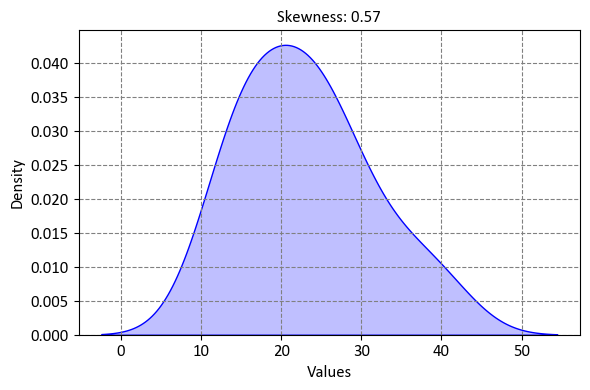

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Sample data
data = np.array([12, 14, 15, 16, 18, 20, 22, 23, 24, 26, 28, 30, 35, 40])

# Calculate skewness
skewness = skew(data)

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a KDE plot
sns.kdeplot(data, fill=True, color="blue", ax=ax)

# Add labels and title
ax.set(xlabel = "Values", ylabel = "Density", title = f"Skewness: {skewness:.2f}")

# Display the plot
plt.tight_layout()

<font color='Blue'><b>Example:</b></font>

In [27]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import skew

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Calculate the skewness of residuals
residual_skew = skew(model.resid)

# Display the skewness of residuals
print(f"Skewness of Residuals: {residual_skew:.4f}")

Skewness of Residuals: -0.1913


We can also obtain this information by using `print(model.summary())`:

In [28]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3766.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.22e-80
Time:                        09:20:53   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.054     10.417      0.0

### Kurtosis
Kurtosis is a statistical measure that quantifies the "tailedness" or the extent to which the tails of a probability distribution differ from those of a normal distribution. In the context of regression analysis or statistics in general, kurtosis provides information about the shape of the distribution of a dataset or variable {cite:p}`norman2008biostatistics`.

Here's how kurtosis works:

1. **Kurtosis and Distribution Shape:**
   Kurtosis focuses on the tails of a distribution. A normal distribution has a kurtosis of 3, and distributions with higher kurtosis have heavier tails, indicating more extreme values than the tails of a normal distribution. Distributions with lower kurtosis have lighter tails, suggesting fewer extreme values.

2. **Leptokurtic Distribution:**
   A distribution with positive kurtosis (greater than 3) is called leptokurtic. Leptokurtic distributions have heavy tails and a peak that is higher and sharper than that of a normal distribution. This means that extreme values are more likely to occur in a leptokurtic distribution.

3. **Platykurtic Distribution:**
   A distribution with negative kurtosis (less than 3) is called platykurtic. Platykurtic distributions have lighter tails and a peak that is lower and flatter than that of a normal distribution. Extreme values are less likely to occur in a platykurtic distribution.

4. **Mesokurtic Distribution:**
   A distribution with kurtosis equal to 3 is called mesokurtic. A mesokurtic distribution has tails and a peak that are similar to those of a normal distribution.

5. **Calculation of Kurtosis:**
   The kurtosis of a dataset $X$ can be calculated using the formula:

   \begin{equation} \text{Kurtosis}(X) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^4}{n \cdot s^4} \end{equation}

   Where:
   - $ n $ is the number of data points in the dataset.
   - $ x_i $ represents each data point.
   - $ \bar{x} $ is the mean of the dataset.
   - $ s $ is the standard deviation of the dataset.

6. **Interpretation:**
   Positive kurtosis indicates heavier tails and a more peaked distribution, while negative kurtosis indicates lighter tails and a flatter distribution. The closer the kurtosis is to 3, the more similar the distribution is to a normal distribution.

In the context of regression analysis, examining the kurtosis of the residuals can provide insights into the distributional characteristics of the model's errors. Kurtosis, along with other diagnostic metrics, helps analysts evaluate the normality assumption and make informed decisions about potential model adjustments or transformations.

<font color='Blue'><b>Example:</b></font>

In [29]:
import numpy as np
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Calculate the skewness and kurtosis of residuals
residual_skew = skew(model.resid)
residual_kurtosis = kurtosis(model.resid)

# Display the skewness and kurtosis of residuals
print(f"Skewness of Residuals: {residual_skew:.4f}")
print(f"Kurtosis of Residuals: {residual_kurtosis:.4f}")


Skewness of Residuals: -0.1913
Kurtosis of Residuals: -1.0671


We can also obtain this information by using `print(model.summary())`:

In [30]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3766.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.22e-80
Time:                        09:20:53   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.054     10.417      0.0

### Condition Number (Cond)

The condition number, often denoted as "Cond," is a metric used to assess the multicollinearity (high correlation) among predictor variables in a regression model. It provides insight into the stability of the regression coefficients and the potential for large changes in the estimated coefficients due to small changes in the data.

Here's how the condition number works:

1. **Objective:**
   The primary goal of examining the condition number is to understand whether the predictor variables in the model are highly correlated with each other. Multicollinearity can lead to unstable coefficient estimates and difficulties in interpreting the contributions of individual variables.

2. **Calculation:**
   The condition number is calculated based on the eigenvalues of the correlation matrix of the predictor variables. Specifically, it is the ratio of the largest eigenvalue to the smallest eigenvalue. Mathematically:

   \begin{equation} \text{Condition Number (Cond)} = \sqrt{\frac{\lambda_{\text{max}}}{\lambda_{\text{min}}}} \end{equation}

   Where:
   - $ \lambda_{\text{max}} $ is the largest eigenvalue of the correlation matrix.
   - $ \lambda_{\text{min}} $ is the smallest eigenvalue of the correlation matrix.

3. **Interpretation:**
   The condition number provides information about the severity of multicollinearity:
   - A low condition number (close to 1) indicates minimal multicollinearity. The predictor variables are not strongly correlated with each other, and the model's coefficients are stable.
   - A high condition number (much greater than 1) indicates strong multicollinearity. The predictor variables are highly correlated, potentially leading to instability in the coefficient estimates. A high condition number suggests that small changes in the data could result in large changes in the estimated coefficients.

4. **Implications:**
   High multicollinearity can make it challenging to interpret the individual contributions of predictor variables and can result in inflated standard errors, making some coefficients appear statistically insignificant when they might not be. It's important to address or mitigate multicollinearity to improve the model's reliability.

<font color='Blue'><b>Example:</b></font>

In [31]:
import numpy as np
import statsmodels.api as sm

# Generate sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1)

# Add a constant term (intercept) to the independent variable
X = sm.add_constant(X)

# Create a linear regression model
model = sm.OLS(y, X).fit()

# Calculate the condition number of the design matrix
condition_number = np.linalg.cond(X)

# Display the condition number
print(f"Condition Number of Design Matrix: {condition_number:.4f}")

Condition Number of Design Matrix: 3.5825


We can also obtain this information by using `print(model.summary())`:

In [32]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     3766.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           5.22e-80
Time:                        09:20:53   Log-Likelihood:                -13.196
No. Observations:                 100   AIC:                             30.39
Df Residuals:                      98   BIC:                             35.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5581      0.054     10.417      0.0